<a href="https://colab.research.google.com/github/Noob919/COVID_19-XRAY-Classification/blob/main/pristine_weight_loss_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense
from keras import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import plot_model

In [2]:
df =  pd.read_csv("/content/PRISTINE PET MP.csv")
df.drop(0, inplace=True)
df.rename(columns={'Unnamed: 3':"Weight loss", 'Unnamed: 4':"DTG",'Unnamed: 5': "label"}, errors="raise",inplace =  True)
df_na = df.dropna()
df_na.tail(5)
df_res =  df_na[['time', 'tem', 'heating rate', 'Weight loss']]
df_res.tail(3)

label = df_na['label']
label = label.reset_index()
def root_series(df):
  df_sq = df*df
  df_sum = df_sq.sum(axis=1)
  root =  pd.Series(data  = df_sum)
  root = pd.DataFrame(np.power(root, 0.5), columns = ['Root'])
  return root

def transformation(DataFrame):
  scaler  = Normalizer()
  transform_df = scaler.fit_transform(DataFrame)
  return transform_df

transform_df = transformation(df_res)
transform_df = pd.DataFrame(transform_df)
transform_df.columns = ['time', 'tem', 'heating rate', 'Weight loss']
transform_df
dataframe = pd.concat([transform_df,label],axis =1)
dataframe
df_training = dataframe.loc[dataframe['label'] == "Training"]
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['Weight loss']

In [3]:
model = keras.Sequential(
    [
        layers.Dense(3, activation="relu"),
        layers.Dense(5, activation="relu"),
        layers.Dense(12, activation="sigmoid"),
        layers.Dense(1),
    ]
)
model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.fit(X, y, epochs=50, batch_size=10, verbose=1, validation_split=0.4)

Epoch 1/50
195/195 [==============================] - 5s 7ms/step - loss: 0.0029 - root_mean_squared_error: 0.0543 - val_loss: 0.0153 - val_root_mean_squared_error: 0.1238
Epoch 2/50
195/195 [==============================] - 1s 5ms/step - loss: 0.0020 - root_mean_squared_error: 0.0450 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1157
Epoch 3/50
195/195 [==============================] - 1s 7ms/step - loss: 0.0012 - root_mean_squared_error: 0.0353 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1094
Epoch 4/50
195/195 [==============================] - 1s 4ms/step - loss: 7.8031e-04 - root_mean_squared_error: 0.0279 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0862
Epoch 5/50
195/195 [==============================] - 1s 4ms/step - loss: 5.4413e-04 - root_mean_squared_error: 0.0233 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0868
Epoch 6/50
195/195 [==============================] - 1s 7ms/step - loss: 3.7857e-04 - root_mean_squared_error: 0.0195 - val_loss: 0

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 5)                 20        
                                                                 
 dense_2 (Dense)             (None, 12)                72        
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 117 (468.00 Byte)
Trainable params: 117 (468.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


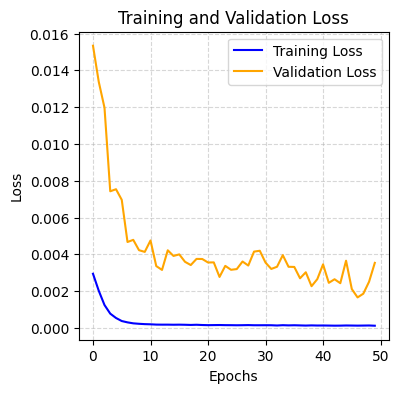

In [6]:
met_df = pd.DataFrame(model.history.history)

# Create a smaller figure with a specified size
plt.figure(figsize=(4, 4))  # Adjust the width and height as needed

plt.plot(met_df['loss'], label='Training Loss', color='blue')
plt.plot(met_df['val_loss'], label='Validation Loss', color='orange')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.grid(True, linestyle='--', alpha=0.5)  # Add a grid with custom styling

plt.title('Training and Validation Loss')
plt.show()

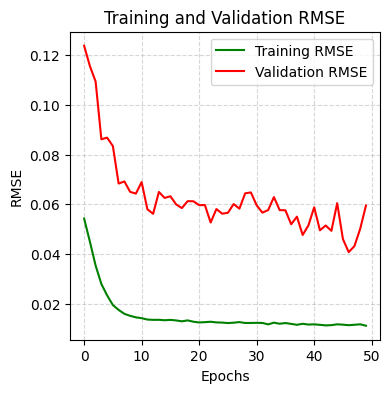

In [7]:
plt.figure(figsize=(4, 4))  # Adjust the width and height as needed

plt.plot(met_df['root_mean_squared_error'], label='Training RMSE', color='green')
plt.plot(met_df['val_root_mean_squared_error'], label='Validation RMSE', color='red')

plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()

plt.grid(True, linestyle='--', alpha=0.5)  # Add a grid with custom styling

plt.title('Training and Validation RMSE')
plt.show()

In [8]:
df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['Weight loss']

X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
predictions = model.predict(X_val)
prediction = pd.DataFrame(predictions)
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df

13/13 [==============================] - 0s 6ms/step


,time,tem,heating rate,preditions,Weight loss
0,0.000004,0.033313,0.999385,-0.005784,0.010937
1,0.000311,0.300432,0.948733,0.110240,0.098216
2,0.000519,0.381624,0.915898,0.142192,0.124477
3,0.000808,0.465167,0.872187,0.173195,0.151356
4,0.001330,0.572406,0.798706,0.209761,0.185525
...,...,...,...,...,...
400,0.069152,0.995783,0.014911,0.118064,0.058405
401,0.069194,0.995785,0.014885,0.117975,0.058339
402,0.069294,0.995785,0.014833,0.117780,0.058221
403,0.069377,0.995785,0.014793,0.117623,0.058132


In [9]:
print('MSE',mean_squared_error(y_val,predictions))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions)))
print('MAE',mean_absolute_error(y_val,predictions))
print('R2_Score',r2_score(y_val,predictions))

MSE 0.0015437609131610682
RMSE 0.03929072299107091
MAE 0.030432860203013744
R2_Score 0.7001635795660661


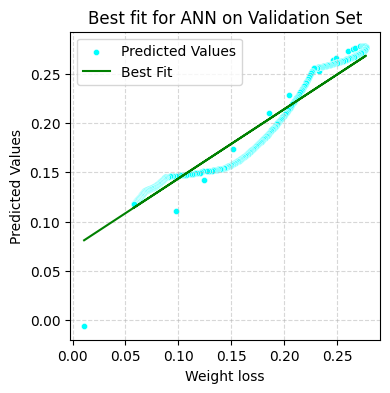

In [11]:
x = final_df['Weight loss']
y = final_df['preditions']
a, b = np.polyfit(x, y, 1)

# Create a smaller figure with a specified size
plt.figure(figsize=(4, 4))

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(data=final_df, x='Weight loss', y='preditions', color='cyan', label='Predicted Values', s=20)

# Plot the best fit line with a specified line width
plt.plot(x, a * x + b, color='green', label='Best Fit', linewidth=1.5)

# Set the grid size and style
plt.grid(True, linestyle='--', alpha=0.5)

plt.title('Best fit for ANN on Validation Set')
plt.xlabel('Weight loss')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()


In [12]:
df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['Weight loss']

predictions = model.predict(X_test)
prediction_test  = pd.DataFrame(predictions)
print('MSE',mean_squared_error(y_test,predictions))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions)))
print('MAE',mean_absolute_error(y_test,predictions))
print('R2_Score',r2_score(y_test,predictions))

13/13 [==============================] - 0s 2ms/step
MSE 0.0015484153977183006
RMSE 0.03934990975489398
MAE 0.030494696821034707
R2_Score 0.6992224967211047


In [13]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
prediction = pd.DataFrame(predictions)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,Weight loss
0,0.000015,0.066503,0.997547,0.009475,0.021831
1,0.000224,0.256752,0.962819,0.092370,0.084016
2,0.000481,0.368694,0.921736,0.137219,0.120283
3,0.001133,0.536658,0.825627,0.198019,0.174176
4,0.001431,0.588983,0.785310,0.215039,0.190749
...,...,...,...,...,...
401,0.069163,0.995784,0.014903,0.118039,0.058386
402,0.069241,0.995785,0.014859,0.117881,0.058278
403,0.069262,0.995786,0.014848,0.117840,0.058252
404,0.069392,0.995785,0.014785,0.117594,0.058115


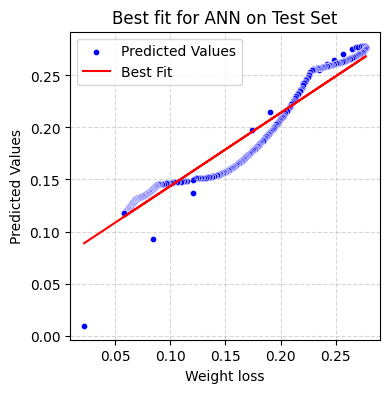

In [14]:
x = final_df_test['Weight loss']
y = final_df_test['predictions_test']
a, b = np.polyfit(x, y, 1)

# Create a smaller figure with a specified size
plt.figure(figsize=(4, 4))

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(data=final_df_test, x='Weight loss', y='predictions_test', color='blue', label='Predicted Values', s=20)

# Plot the best fit line with a specified line width
plt.plot(x, a * x + b, color='red', label='Best Fit', linewidth=1.5)

# Set the grid size and style
plt.grid(True, linestyle='--', alpha=0.5)

plt.title('Best fit for ANN on Test Set')
plt.xlabel('Weight loss')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()


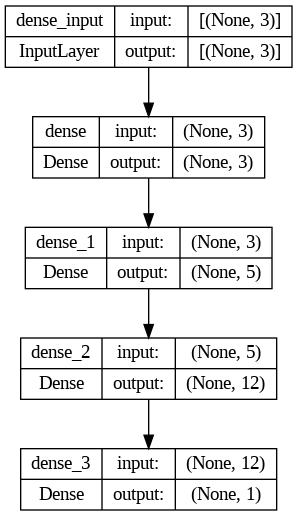

In [15]:
plot_model(model, to_file='/content/model.jpg',show_shapes=True)